## In order to see if our pipeline is good at detecting transiting exoplanets, we should test it on known TESS Objecgts of Interest(TOIs) list at 
https://archive.stsci.edu/prepds/tess-data-alerts/

# Here is the list of targets I think we should look at:
Jupiter sized (10 - 11 Earth radii)

25155310 (SuperWASP 126), Sector 1 https://archive.stsci.edu/hlsps/tess-data-alerts/hlsp_tess-data-alerts_tess_phot_00025155310-s01-01_tess_v1_dvs.pdf

29344935 (HATS 14), Sector 1 https://archive.stsci.edu/hlsps/tess-data-alerts/hlsp_tess-data-alerts_tess_phot_00029344935-s01-01_tess_v1_dvs.pdf


Super Earth Sized (3 - 5 Earth radii)

55650590 Sectors 1-3 https://archive.stsci.edu/hlsps/tess-data-alerts/hlsp_tess-data-alerts_tess_phot_00055650590-s01s02-01_tess_v1_dvs.pdf


Earth Sized (0.5 - 2 Earth radii)
52368076 (TOI 125), Sectors 1-3 https://archive.stsci.edu/hlsps/tess-data-alerts/hlsp_tess-data-alerts_tess_phot_00052368076-s01-02_tess_v1_dvs.pdf

62483237 sector 1, https://archive.stsci.edu/hlsps/tess-data-alerts/hlsp_tess-data-alerts_tess_phot_00062483237-s01-01_tess_v1_dvs.pdf

92226327 (sector 3, multi-planet, LHS-1140 b and c)  https://archive.stsci.edu/hlsps/tess-data-alerts/hlsp_tess-data-alerts_tess_phot_00092226327-s03-01_tess_v1_dvs.pdf

231702397, sector 1  https://archive.stsci.edu/hlsps/tess-data-alerts/hlsp_tess-data-alerts_tess_phot_00231702397-s01-01_tess_v1_dvs.pdf

In [19]:
TOI_IDs_Sector1 = [25155310, 29344935, 55650590, 52368076, 62483237, 231702397 ]
TOI_IDs_Sector2 = [55650590, 52368076]
TOI_IDs_Sector3 = [92226327,55650590]

## In many cases, we can download these specific light curves from Filtergraph.
## In this example, I will also download the FFI directly from MAST for comparison. I will use the code I introduced in the Introduction to Photometry Part 1 tutorial to do this.

In [20]:
#importing modules:
import lightkurve as lk


import glob, os
from os import listdir
from os.path import isfile, join
import fnmatch

#Needed for making plots
import matplotlib.pyplot as plt
from matplotlib import pylab
from pylab import *
import matplotlib.gridspec as gridspec

#Needed for handling lists, arrays, strings, importing data and general math
import numpy as np
# import pandas as pd #optional (may be used in future)

#Needed for r
import astropy
from astropy.stats import BoxLeastSquares # <--- Super Important! We use this to search for periodic events in our data.
# print(astropy.__version__)

from transitleastsquares import catalog_info
from transitleastsquares import period_grid
from transitleastsquares import transitleastsquares

import warnings
# warnings.filterwarnings(action='once') #useful to see a warning once but that's it
warnings.simplefilter("ignore", category=PendingDeprecationWarning)

import wotan
from wotan import flatten


from astroML.time_series import lomb_scargle


def ChauventsCriteron(x, y, z, mean=None, stdv=None):
    from scipy.special import erfc
    if mean is None:
        mean = y.mean()           # Mean of incoming array y
    if stdv is None:
        stdv = y.std()            # Its standard deviation
    N = len(y)                   # Lenght of incoming arrays
    criterion = 1.0/(2*N)        # Chauvenet's criterion
    d = abs(y-mean)/stdv         # Distance of a value to mean in stdv's
    d /= 2.0**0.5                # The left and right tail threshold values
    prob = erfc(d)               # Area normal dist.    
    filter = prob >= criterion   # The 'accept' filter array with booleans
    
    xf = x[filter]; yf = y[filter]; zf=z[filter]

    return xf,yf,zf
# For some light curves, where there are flare events, we may need to 
# turn this off. (Will add in future versions)

# Many of the TOIs will not be in our sample that we downloaded so we will have to create a new target list to feed into filtergraph:

## You can find this list and light curves in the TOI folder of this Github repository

In [21]:
#path where data is stored

path = '/Users/felizd/Desktop/TESS/9_wotan_pipeline/TOIs/curves/clean'

#path where figures will be saved
figpath = '/Users/felizd/Desktop/TESS/9_wotan_pipeline/TOIs/plots/' 

#path where we will save our light curves later
savepath = '/Users/felizd/Desktop/TESS/9_wotan_pipeline/TOIs/processed/' 

#This portion of code is designed to recursively search through a directory 
#for all files in the path that end with .lc in their filename
data = [os.path.join(dirpath, f) # an array of path names to be looped over
    for dirpath, dirnames, files in os.walk(path) #recursively searches through directory
    for f in fnmatch.filter(files, '*.lc')] #finds every file (*) that ends with .lc

data.sort(key=lambda x: int(os.path.basename(x).split('_')[0])) #sorts them in alphanumeric order based on TIC ID (smallest first)

print ("number of files: ",len(data)) #number of files)
print( "NOTE: not all of these are available on filtergraph (for some reason...)")

number of files:  7
NOTE: not all of these are available on filtergraph (for some reason...)


SDE Threshold:  2
 
iteration 1
Applying Quasi Periodic GP...
Segment 1 of 3


        Use astropy.stats.LombScargle instead. [warnings]


Segment 2 of 3
Segment 3 of 3
 
file:
TIC  25155310   1   4   Sector01
best period:  3.288853779542904
best T0:  2.115901844209739


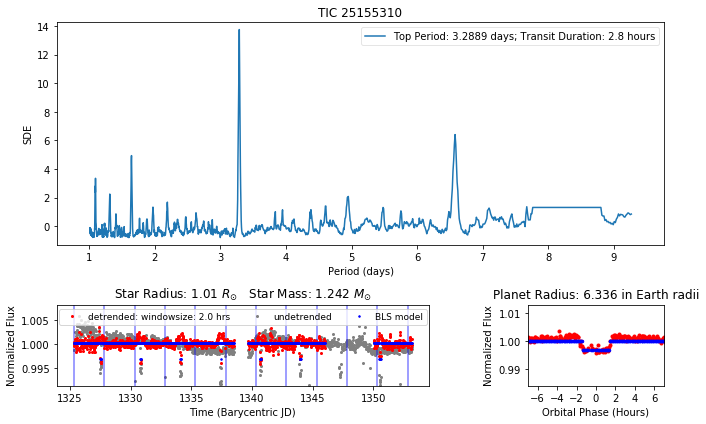


 
iteration 2
Applying Biweighted Midcorrelation Function...


        Use astropy.stats.LombScargle instead. [warnings]


 
file:
TIC  29344935   4   1   Sector01
best period:  2.7668254675779975
best T0:  0.8114510301392057


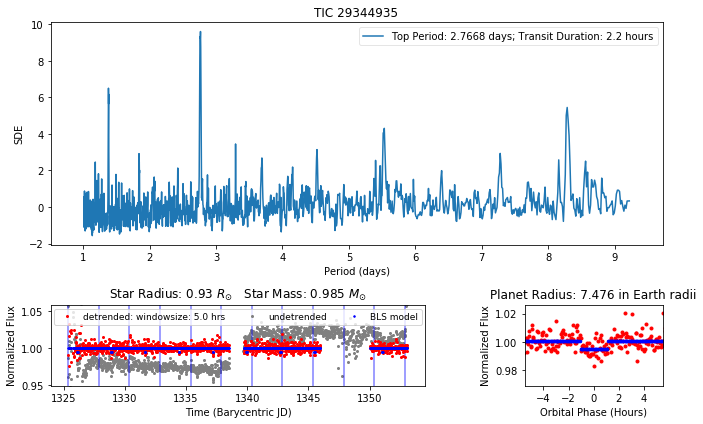


 
iteration 3
Applying Biweighted Midcorrelation Function...
 
file:
TIC  52368076   1   3   Sector01
best period:  9.153966428930422
best T0:  7.134413805088807


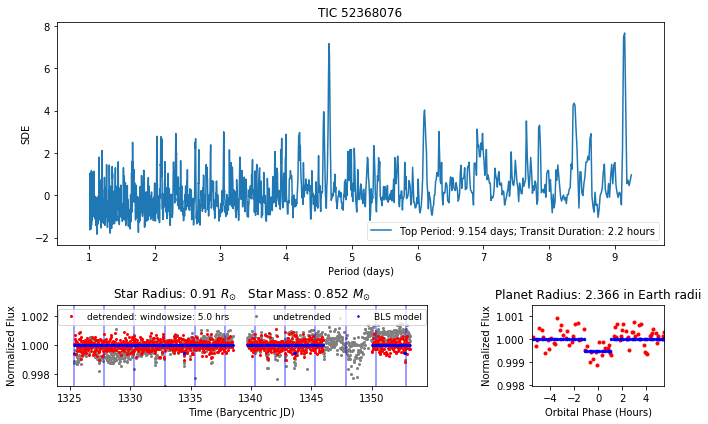


 
iteration 4
Applying Biweighted Midcorrelation Function...
 
file:
TIC  52368076   2   3   Sector02
best period:  4.6570838963791985
best T0:  0.1255408203200048


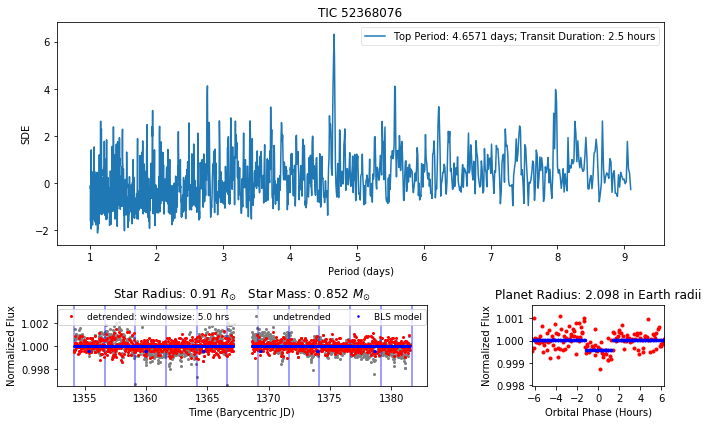


 
iteration 5
Applying Biweighted Midcorrelation Function...
 
file:
TIC  62483237   2   1   Sector01
best period:  9.204914532619753
best T0:  0.17500563608882658


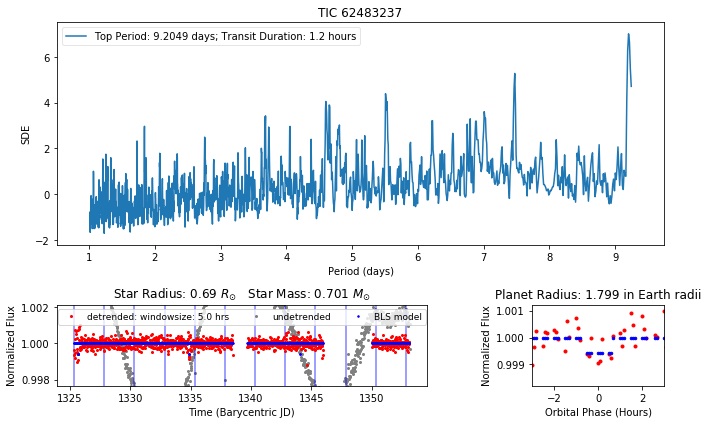


 
iteration 6
Applying Quasi Periodic GP...
Segment 1 of 1
 
file:
TIC  92226327   1   1   Sector03
best period:  3.7763511199442386
best T0:  3.375973100408702


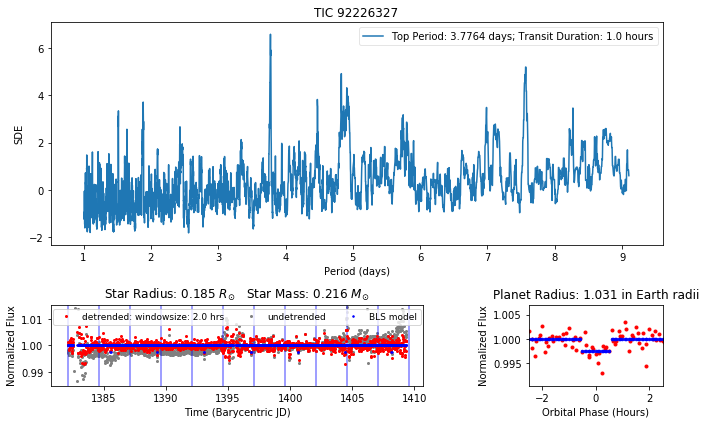


 
iteration 7
Applying Quasi Periodic GP...
Segment 1 of 3


        Use astropy.stats.LombScargle instead. [warnings]


Segment 2 of 3


/Users/felizd/anaconda2/envs/py3.6/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 228596.62445068, 2170682.47527313,   96652.13370132]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 57, 'nit': 5, 'warnflag': 2}
  ConvergenceWarning)


Segment 3 of 3
 
file:
TIC  231702397   1   2   Sector01
best period:  1.4025784532779204
best T0:  1.3157546523651946


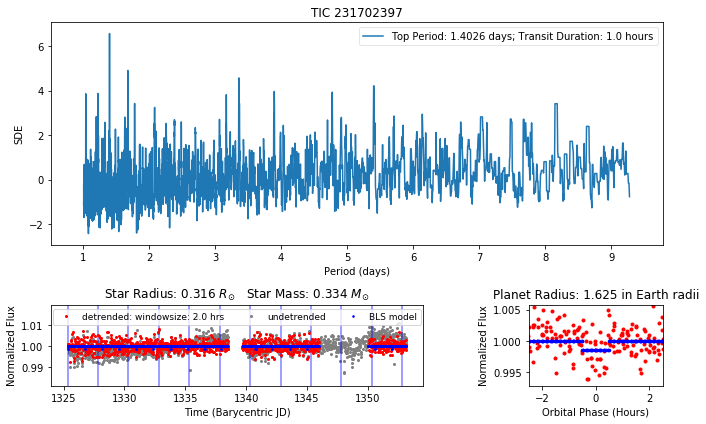

In [22]:
spacing = 0.02

SDE_threshold=2

fs = 9
#for reporting BLS model's planet radius
R_earth = 6.378*10.0**8.0 #cm
R_sun = 6.955*10.0**10.0 #cm

print("SDE Threshold: ", SDE_threshold)

for ii in range(len(data)): #creating a for loop to show light curve figures for all files

    
    time     = np.transpose(np.loadtxt(data[ii]))[0] #first  (zero indexing in python) column 
    mag      = np.transpose(np.loadtxt(data[ii]))[1] #second (zero indexing in python) column 
    magerror = np.transpose(np.loadtxt(data[ii]))[2] #third (zero indexing in python) column 
    
    mask = np.where(np.isnan(mag)==False)[0] #creating array of only real numbers by setting np.isnan(mag)==False. 
    time = time[mask]                        #Sometimes there are holes in data filled with NaNs
    mag = mag[mask]
    magerror = magerror[mask]
    
    flux = 10.0**(mag/-2.5)/np.mean(10.0**(mag/-2.5))
    fluxerror = flux*(10.0**(magerror/2.5)-1.0)
    
    #known bad data points with high telescope jitter:
    SectorNum = int((os.path.basename(data[ii]).split)('_')[1][6:])
    if SectorNum==1:
        jittermask = (time < 1346) | (time > 1350)
    
        #removing outliers with Chauvenet's criterion
        t2,f2,fe2 = ChauventsCriteron(time[jittermask],flux[jittermask],fluxerror[jittermask])
    else:
        t2,f2,fe2 = ChauventsCriteron(time,flux,fluxerror)
    
    lc = lk.LightCurve(t2,f2,fe2) #outlier removed only
    
    #check for rapid rotators with Lomb-Scargle (P_rot < 2 days)
    period = 10 ** np.linspace(np.log10(0.1), np.log10(3), 1000)
    freq = 2.0 * np.pi / period
    PS = lomb_scargle(t2,f2,fe2,omega=freq, generalized=True)
    Standpower = (PS-np.mean(PS))/np.std(PS)
    print(" ")    
    print("iteration",ii+1)
    
    if period[np.argmax(Standpower)] < 2:

        print("Applying Quasi Periodic GP...")
        length_scale=2 # 1 to 2 is generally pretty good from my tests
        gpflatten_lc, gptrend_lc = flatten(t2,f2,method='gp', \
                                             kernel='periodic_auto',kernel_size=length_scale,return_trend=True,robust=True)
        
        T=t2
        F= gpflatten_lc
        FE = fe2
        window_size_wotan = length_scale/24.0
    else:

        print("Applying Biweighted Midcorrelation Function...")
        window_size_wotan = 5.0/24.0 # The length of the filter window in units of time (days)
        flatten_lc, trend_lc = flatten(t2, f2, window_length=window_size_wotan, return_trend=True, method='biweight',robust=True)
        T=t2
        F=flatten_lc
        FE=fe2

    #checking for NaNs
    nanmask = np.where(np.isnan(F)==False)[0]
    T = T[nanmask]
    F = F[nanmask]
    FE =FE[nanmask]


#     Try another iteration of outlier removal
    T,F,FE = ChauventsCriteron(T,F,FE)
    
    ID = (os.path.basename(data[ii]).split)('_')[0]


    Sector = "S"+(os.path.basename(data[ii]).split)('_')[1][1:] #by default, this has lower case "s"
    #^^^ so I added a capital "S" and remove the first element ("s") of this string
    # with this index slice [1:]. This isn't really imporant, just being tidy.

    Camera = (os.path.basename(data[ii]).split)('_')[2] 
    CCD = (os.path.basename(data[ii]).split)('_')[3][-4]
    
    
    #doing BLS search:
    
    qld, R_star, R_star_min, R_star_max, M_star, M_star_min, M_star_max = catalog_info(TIC_ID=int(ID))   
    #^^^ grabbing stellar information from MAST catalogs
    
    if np.isfinite(R_star)==True and np.isfinite(M_star)==True: #checks to see if stellar information is unknown in MAST catalogs
        minP=1.01
        maxP= (max(T)-min(T)) #length of our light curve
        minDur = 1.0/24.0
        maxDur = 5.0/24.0
        
        #creating list of orbital periods to model with
        periods = period_grid(R_star=R_star, M_star=M_star, time_span=maxP, period_min=minP, period_max=maxP/3.0)#,oversampling_factor=10)

        durations = np.linspace(minDur,maxDur,25)
    
        bls = BoxLeastSquares(T,F,FE)
        bls_power = bls.power(periods, durations)
        bls_SDE = (bls_power.power - np.mean(bls_power.power))/np.std(bls_power.power)
        
        #phase folding with best BLS model
        index = np.argmax(bls_power.power); 
        best_period = bls_power.period[index]; 
        best_duration = bls_power.duration[index]
        best_t0 = bls_power.transit_time[index];
        BLS_depths=bls_power.depth[index]
        dur = minDur #0.5

        #creating the best fit box model to our data
        bls_model=bls.model(T,bls_power.period[index], bls_power.duration[index], bls_power.transit_time[index])
        
        #calculating planet radius fit by BLS
        R_p = np.sqrt(BLS_depths)*R_star*R_sun/R_earth
        
        
        p = best_period
        x_fold = (T - best_t0 + 0.5*p) % p - 0.5*p
        x_fold_raw = (time - best_t0 + 0.5*p) % p - 0.5*p
        
        detrendedphasefoldedlc = [x_fold, F, FE]
        phasefoldedlc = [x_fold_raw,flux,fluxerror]


        if len(np.where(bls_SDE>SDE_threshold)[0])>0:
            print(" ")
            print("file:")
            print("TIC ", ID, " ",CCD, " ",Camera, " ",Sector)
            print("best period: ", best_period)
            print("best T0: ",best_t0)

            gs1 = gridspec.GridSpec(3, 3)
            gs1.update(left=0.65, right=1.25, wspace=0.25,hspace=0.5)


            f = plt.figure(figsize=(10,6))
            ax1 = f.add_subplot(gs1[:-1, :])
            ax2 = f.add_subplot(gs1[-1, :-1])
            ax3 = f.add_subplot(gs1[-1, -1])

            ax1.plot(bls_power.period, bls_SDE, rasterized=True, label='Top Period: '+str( np.round(best_period,4) )+" days; Transit Duration: "+str(np.round(24*best_duration,4))+" hours") #rounding period to 4 decimal places 
            ax1.set_xticks(np.arange(0.0, 10.0, 1.0))
            ax1.set_title("TIC "+ ID)
            ax1.set_xlabel("Period (days)")
            ax1.set_xlim(np.min(bls_power.period)-0.5, np.max(bls_power.period)+0.5)
            ax1.set_ylabel("SDE")
            ax1.set_ylim(np.min(bls_SDE)-0.5, np.max(bls_SDE)+0.5)
            ax1.legend(loc='best',fancybox=True,framealpha=0.5)

            ax2.plot(T, F ,c='red',markersize=4,marker='.',linestyle='none',zorder=1,label='detrended: windowsize: '+str(window_size_wotan*24)+' hrs')#+", binsize: "+str(bin_size)) 
            ax2.plot(time,flux,c='grey',marker='.',markersize=4,linestyle='none',zorder=0,label='undetrended')
            ax2.plot(T,bls_model,'b.',markersize=3,label='BLS model')
            ax2.legend(loc='upper center',ncol=3,fontsize=fs)
#             ax2.set_ylim(np.min(f2_wotan)-spacing, np.max(f2_wotan)+spacing)
            ax2.set_ylim(np.min(F)-5*np.std(F), np.max(F)+5*np.std(F))
            ax2.set_xlabel("Time (Barycentric JD)")
            ax2.set_ylabel("Normalized Flux") 
            ax2.set_title("Star Radius: "+str(np.round(R_star,3))+r" $R_{\odot}$   Star Mass: "+str(np.round(M_star,3))+r" $M_{\odot}$")
            for x in range(12):
                ax2.axvline(x=(T[0]+x*2.5),color='b',alpha=0.5,zorder=0)
            
            
            ax3.plot(24*x_fold,detrendedphasefoldedlc[1],c='red',markersize=6,marker='.',linestyle='none',zorder=1,label='detrended: windowsize: '+str(window_size_wotan*24))#+", binsize: "+str(bin_size))
#             ax3.plot(24*x_fold_raw,phasefoldedlc[1],c='grey',marker='.',markersize=6,linestyle='none',zorder=0,label='undetrended')
            ax3.plot(24*x_fold,bls_model,'b.',markersize=5,label='BLS model')
            ax3.set_title("Planet Radius: "+str(np.round(R_p,3))+" in Earth radii")
            ax3.set_xlabel("Orbital Phase (Hours)")
            ax3.set_ylabel("Normalized Flux") 
#             ax3.set_ylim(np.min(bls_model)-spacing+0.01, np.max(bls_model)+spacing-0.01)
            ax3.set_ylim(np.min(bls_model)-25*np.std(bls_model), np.max(bls_model)+25*np.std(bls_model))
            ax3.set_xticks(np.arange(-10,15,2)) #hours
            ax3.set_xlim(-2.5*best_duration*24,2.5*best_duration*24)
            gs1.tight_layout(f)

            plt.savefig(figpath+"BLS/TIC_"+ID+"_"+Sector+"_Camera_"+Camera+"_CCD_"+CCD+"_BLS.png")
            plt.show()    
            print( "") #adds space between figures
            
    else:
        continue
        print(" ") #adds space between figures
        
        

SDE Threshold:  2.0
 
iteration 1
Applying Quasi Periodic GP...
 
Segment 1 of 3


        Use astropy.stats.LombScargle instead. [warnings]


Segment 2 of 3
Segment 3 of 3
Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 117 durations
Searching 1071 data points, 1726 periods from 1.01 to 9.278 days
Using all 4 CPU threads
 
file:
TIC  25155310   1   4   Sector01
best period:  3.2892626149951947
best T0:  1327.5342365141883


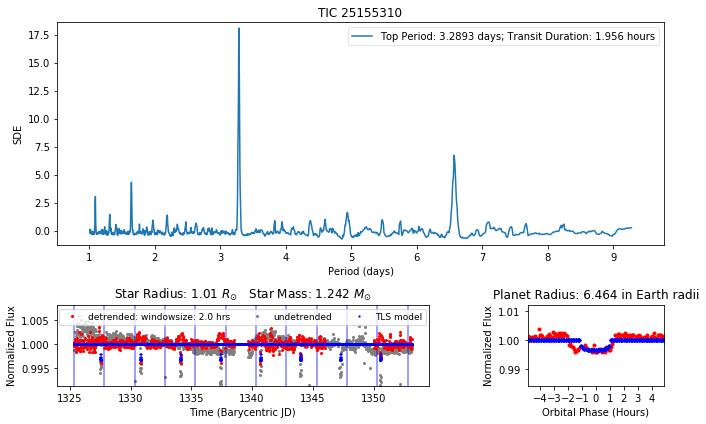


 
iteration 2
Applying Biweighted Midcorrelation Function...
 


        Use astropy.stats.LombScargle instead. [warnings]


Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 117 durations
Searching 1054 data points, 1714 periods from 1.01 to 9.229 days
Using all 4 CPU threads
 
file:
TIC  29344935   4   1   Sector01
best period:  2.760898923172111
best T0:  1326.1495650808947


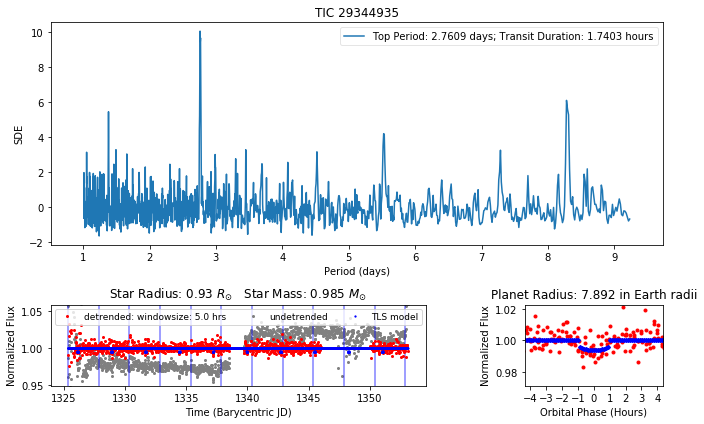


 
iteration 3
Applying Biweighted Midcorrelation Function...
 
Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 117 durations
Searching 1075 data points, 1722 periods from 1.011 to 9.264 days
Using all 4 CPU threads
 
file:
TIC  52368076   1   3   Sector01
best period:  4.648703913087866
best T0:  1327.4333358380898


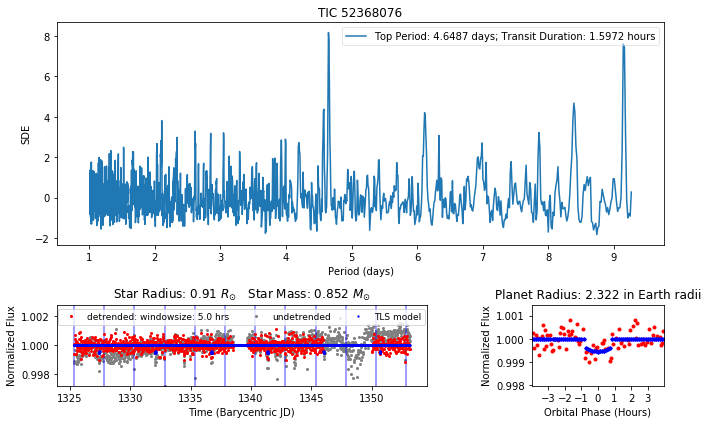


 
iteration 4
Applying Biweighted Midcorrelation Function...
 
Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 116 durations
Searching 1226 data points, 1685 periods from 1.011 to 9.111 days
Using all 4 CPU threads
 
file:
TIC  52368076   2   3   Sector02
best period:  4.6534007061536915
best T0:  1355.373613697551


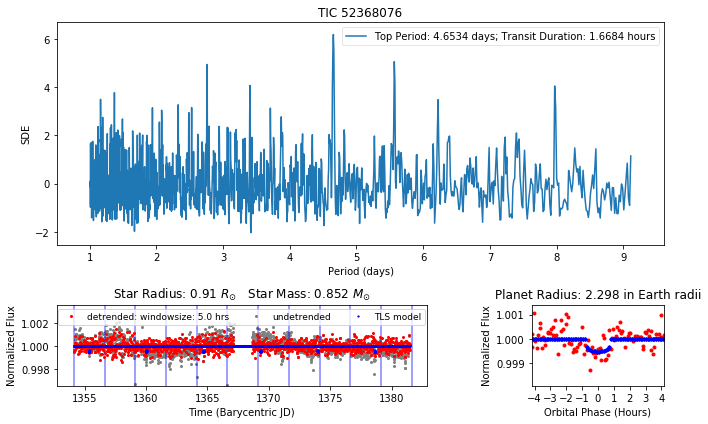


 
iteration 5
Applying Biweighted Midcorrelation Function...
 
Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 117 durations
Searching 1073 data points, 1721 periods from 1.01 to 9.257 days
Using all 4 CPU threads
 
file:
TIC  62483237   2   1   Sector01
best period:  9.221846574243385
best T0:  1325.684861283951


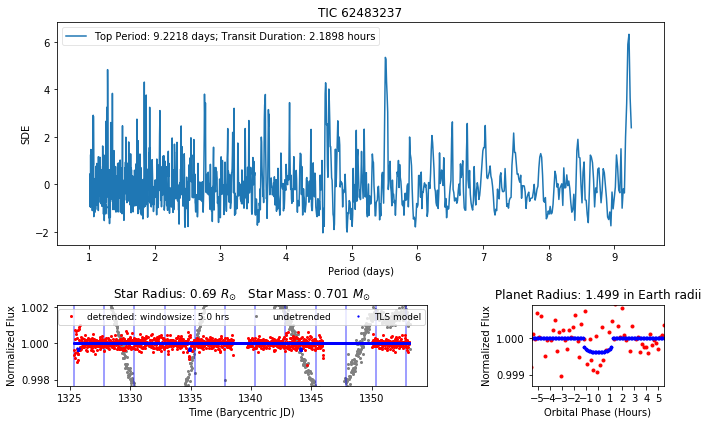


 
iteration 6
Applying Quasi Periodic GP...
 
Segment 1 of 1
Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 116 durations
Searching 1259 data points, 1684 periods from 1.01 to 9.104 days
Using all 4 CPU threads
 
file:
TIC  92226327   1   1   Sector03
best period:  3.7800504372857495
best T0:  1385.5044995751723


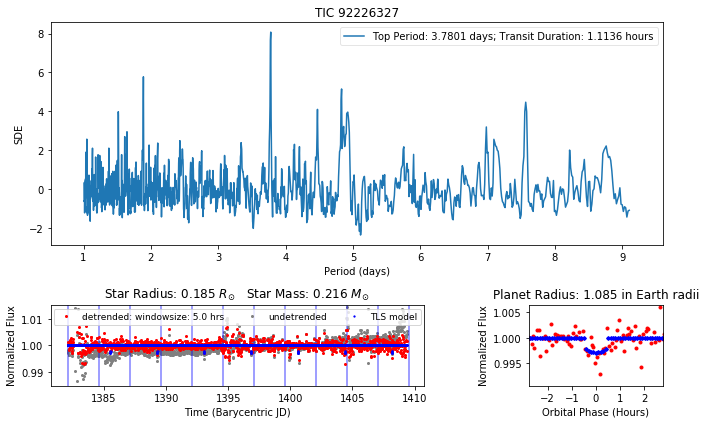


 
iteration 7
Applying Quasi Periodic GP...
 
Segment 1 of 3


        Use astropy.stats.LombScargle instead. [warnings]


Segment 2 of 3


/Users/felizd/anaconda2/envs/py3.6/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 228596.62445068, 2170682.47527313,   96652.13370132]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 57, 'nit': 5, 'warnflag': 2}
  ConvergenceWarning)


Segment 3 of 3
Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 117 durations
Searching 1083 data points, 1726 periods from 1.01 to 9.278 days
Using all 4 CPU threads


/Users/felizd/anaconda2/envs/py3.6/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/felizd/anaconda2/envs/py3.6/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/felizd/anaconda2/envs/py3.6/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 
file:
TIC  231702397   1   2   Sector01
best period:  1.4024616713355293
best T0:  1325.3520203306427


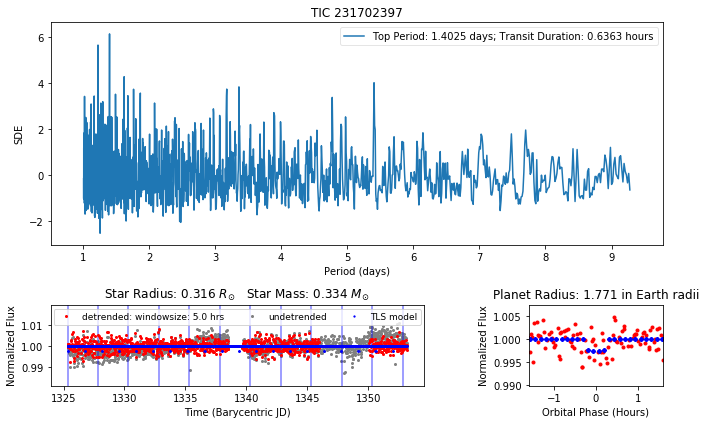

In [23]:
spacing = 0.02
bin_size = 5
SDE_threshold=2.0

fs = 9
#for reporting TLS model's planet radius
R_earth = 6.378*10.0**8.0 #cm
R_sun = 6.955*10.0**10.0 #cm

print("SDE Threshold: ", SDE_threshold)
for ii in range(len(data)): #creating a for loop to show light curve figures for all files
    
    time     = np.transpose(np.loadtxt(data[ii]))[0] #first  (zero indexing in python) column 
    mag      = np.transpose(np.loadtxt(data[ii]))[1] #second (zero indexing in python) column 
    magerror = np.transpose(np.loadtxt(data[ii]))[2] #third (zero indexing in python) column 
    
    mask = np.where(np.isnan(mag)==False)[0] #creating array of only real numbers by setting np.isnan(mag)==False. 
    time = time[mask]                        #Sometimes there are holes in data filled with NaNs
    mag = mag[mask]
    magerror = magerror[mask]
    
    flux = 10.0**(mag/-2.5)/np.mean(10.0**(mag/-2.5))
    fluxerror = flux*(10.0**(magerror/2.5)-1.0)
    
    #known bad data points with high telescope jitter:
    SectorNum = int((os.path.basename(data[ii]).split)('_')[1][6:])
    if SectorNum==1:
        jittermask = (time < 1346) | (time > 1350)
    
        #removing outliers with Chauvenet's criterion
        t2,f2,fe2 = ChauventsCriteron(time[jittermask],flux[jittermask],fluxerror[jittermask])
    else:
        t2,f2,fe2 = ChauventsCriteron(time,flux,fluxerror)
        
    lc = lk.LightCurve(t2,f2,fe2) #outliers removed only
    
    #check for rapid rotators with Lomb-Scargle (P_rot < 2 days)
    period = 10 ** np.linspace(np.log10(0.1), np.log10(3), 1000)
    freq = 2.0 * np.pi / period
    PS = lomb_scargle(t2,f2,fe2,omega=freq, generalized=True)
    Standpower = (PS-np.mean(PS))/np.std(PS)
    print(" ")    
    print("iteration",ii+1)
    
    if period[np.argmax(Standpower)] < 2: #assuming rapid rotators only rotate faster than 2 days

        print("Applying Quasi Periodic GP...")
        print(" ")
        length_scale=2 # 1 to 2 is generally pretty good from my tests
        gpflatten_lc, gptrend_lc = flatten(t2,f2,method='gp', \
                                             kernel='periodic_auto',kernel_size=length_scale,return_trend=True,robust=True)
        
        T=t2
        F= gpflatten_lc
        FE = fe2
    else:

        print("Applying Biweighted Midcorrelation Function...")
        print(" ")
        
        window_size_wotan = 5.0/24.0 # The length of the filter window in units of time (days)
        flatten_lc, trend_lc = flatten(t2, f2, window_length=window_size_wotan, return_trend=True, method='biweight',robust=True)
        T=t2
        F=flatten_lc
        FE=fe2

    #checking for NaNs
    nanmask = np.where(np.isnan(F)==False)[0]
    T = T[nanmask]
    F = F[nanmask]
    FE =FE[nanmask]


#     Try another iteration of outlier removal
    T,F,FE = ChauventsCriteron(T,F,FE)
    
    ID = (os.path.basename(data[ii]).split)('_')[0]


    Sector = "S"+(os.path.basename(data[ii]).split)('_')[1][1:] #by default, this has lower case "s"
    #^^^ so I added a capital "S" and remove the first element ("s") of this string
    # with this index slice [1:]. This isn't really imporant, just being tidy.

    Camera = (os.path.basename(data[ii]).split)('_')[2] 
    CCD = (os.path.basename(data[ii]).split)('_')[3][-4]
    
    
    #doing TLS search:
    
    qld, R_star, R_star_min, R_star_max, M_star, M_star_min, M_star_max = catalog_info(TIC_ID=int(ID))   
    #^^^ grabbing stellar information from MAST catalogs
    
    if np.isfinite(R_star)==True and np.isfinite(M_star)==True: #checks to see if stellar information is unknown in MAST catalogs
        minP=1.01
        maxP= (max(T)-min(T))/3.0 #1/3rd length of our light curve to ensure at least 3 transits are fitted
        
        minDur = 1.0/24.0
        maxDur = 5.0/24.0
        durations = np.linspace(minDur,maxDur,25) #not used by TLS, consider toying with dur_gridstep?
        
        #creating list of orbital periods to model with
        periods = period_grid(R_star=R_star, M_star=M_star, time_span=maxP, period_min=minP, period_max=maxP)#,oversampling_factor=10)

        
    

        tls = transitleastsquares(T,F,FE)
        tls_power = tls.power(period_min=minP,period_max=maxP,show_progress_bar=False,n_transits_min=3,duration_grid_step=1.02)
        
        #TLS results
        TLS_periods=tls_power.period
        TLS_t0s=tls_power.T0
        TLS_depths=tls_power.depth
        TLS_SDE=tls_power.power
        TLS_Dur = tls_power.duration
        
        #calculating TLS estimated planet radius
        R_p = np.sqrt(1-TLS_depths)*R_star*R_sun/R_earth
        
        #creating the best fit box model to our data
        TLS_model_time = tls_power.model_lightcurve_time 
        TLS_model = tls_power.model_lightcurve_model #results.model_folded_model <--- old
        
        p = TLS_periods
        pf_model = (TLS_model_time - TLS_t0s + 0.5*p) % p - 0.5*p        
        x_fold = (T - TLS_t0s + 0.5*p) % p - 0.5*p
        x_fold_raw = (lc.time - TLS_t0s + 0.5*p) % p - 0.5*p
        
        detrendedphasefoldedlc = [x_fold, F, FE]
        phasefoldedlc = [x_fold_raw, lc.flux, lc.flux_err]


        if len(np.where(TLS_SDE>SDE_threshold)[0])>0:
            print(" ")
            print("file:")
            print("TIC ", ID, " ",CCD, " ",Camera, " ",Sector)
            print("best period: ", TLS_periods)
            print("best T0: ",TLS_t0s)
            
            gs1 = gridspec.GridSpec(3, 3)
            gs1.update(left=0.65, right=1.25, wspace=0.25,hspace=0.5)


            f = plt.figure(figsize=(10,6))
            ax1 = f.add_subplot(gs1[:-1, :])
            ax2 = f.add_subplot(gs1[-1, :-1])
            ax3 = f.add_subplot(gs1[-1, -1])


            ax1.plot(tls_power.periods, TLS_SDE, rasterized=True,label='Top Period: '+str( np.round(TLS_periods,4) )+" days; Transit Duration: "+str(np.round(24*TLS_Dur,4))+" hours") #rounding period to 4 decimal places 
            plt.xticks(np.arange(0.0, 31.0, 1.0))
            ax1.set_title("TIC "+ ID)
            ax1.set_xlabel("Period (days)")
            ax1.set_xlim(np.min(tls_power.periods)-0.5, np.max(tls_power.periods)+0.5)
            ax1.set_xticks(np.arange(1.0, 10.0, 1.0))
            ax1.set_ylabel("SDE")
            ax1.set_ylim(np.min(TLS_SDE)-0.5, np.max(TLS_SDE)+0.5)
            ax1.legend(loc='best',fancybox=True,framealpha=0.5)
            
            ax2.plot(T, F ,c='red',markersize=4,marker='.',linestyle='none',zorder=1,label='detrended: windowsize: '+str(window_size_wotan*24)+' hrs')#+", binsize: "+str(bin_size)) 
            ax2.plot(time,flux,c='grey',marker='.',markersize=4,linestyle='none',zorder=0,label='undetrended')
            ax2.plot(TLS_model_time,TLS_model,'b.',label='TLS model',markersize=2.5)
            ax2.legend(loc='upper center',ncol=3,fontsize=fs)
#             ax2.set_ylim(np.min(f2_wotan)-spacing, np.max(f2_wotan)+spacing) 
            ax2.set_ylim(np.min(F)-5*np.std(F), np.max(F)+5*np.std(F))
            for x in range(12):
                ax2.axvline(x=(T[0]+x*2.5),color='b',alpha=0.5,zorder=0)
#             r'$\alpha 
            ax2.set_title("Star Radius: "+str(np.round(R_star,3))+r" $R_{\odot}$   Star Mass: "+str(np.round(M_star,3))+r" $M_{\odot}$")
            
            ax2.set_xlabel("Time (Barycentric JD)")
            ax2.set_ylabel("Normalized Flux") 

            ax3.plot(24*x_fold,detrendedphasefoldedlc[1],c='red',markersize=6,marker='.',linestyle='none',zorder=1,label='detrended: windowsize: '+str(window_size_wotan*24)+", binsize: "+str(bin_size))
#             ax3.plot(24*x_fold_raw,phasefoldedlc[1],c='grey',marker='.',markersize=6,linestyle='none',zorder=0,label='undetrended')
            ax3.plot(24*pf_model,TLS_model,'b.',label='TLS model',markersize=5)
            ax3.set_xlabel("Orbital Phase (Hours)")
            ax3.set_ylabel("Normalized Flux") 
            ax3.set_title("Planet Radius: "+str(np.round(R_p,3))+" in Earth radii")
#             ax3.set_ylim(np.min(TLS_model)-spacing+0.01, np.max(TLS_model)+spacing-0.01)
            ax3.set_ylim(np.min(TLS_model)-25*np.std(TLS_model), np.max(TLS_model)+25*np.std(TLS_model))
            ax3.set_xticks(np.arange(-10,15,1)) #hours
            ax3.set_xlim(-2.5*TLS_Dur*24,2.5*TLS_Dur*24)
            gs1.tight_layout(f)

            plt.savefig(figpath+"TLS/TIC_"+ID+"_"+Sector+"_Camera_"+Camera+"_CCD_"+CCD+"_TLS.png")
            plt.show()    
            print( "") #adds space between figures
            
    else:
        continue
        print(" ") #adds space between figures
